#Lab 3

##Teddy Halliden

###May 7th, 2021

#Introduction

The purpose of this lab is to explore the effects of different filter types on a chosen time series. 

#Background

  A filter is a process that recieves a signal as an input and outputs an altered version of that signal. Different types of filters are used in almost every aspect of life, not just data analysis or digital signal processing. Products like glasses and sunglasses are examples of such filters. They recieve light as input and then alter the shape and frequency behavior of that light before it reaches your eye. In Time Series Analysis, linear filters are often used in order to alter the amplitude of cyclical components in a realization at specified frequencies. Low-Pass filters reduce the amplitude of frequency oscillations above a certain frequency threshold and High-pass filters reduce the amplitude of frequency oscillations below a certain frequency threshold. Band-Pass filters reduce the amplitude of frequency oscillations outside of a specified frequency interval and Band-stop filters reduce the amplitude of frequency oscillations within a specified frequency interval (Hartman).

>

  A real life application of these types of linear filters can be found by listening to almost any song the radio. A large of part of the music production process involves altering the audio signals of instruments or components in a song so that they occupy specific frequency ranges that make the song pleasurable to listen to. When too many instruments occupy the same frequency range, they can clash and create dissonance, making the song unpleasurable. This problem is remedied with an equalizer, a piece of software or hardware which utilizes linear filters to increase or decrease the amplitude of an audio signal at specified frequencies ranges.

>

Filters are important because there are many situations where we want to transform our data before performing some task or analysis. With filters we can accomplish the transformations required for different tasks.

#Methodology

For this lab I am going to look at Airline passenger data, which exhibits a high degree of seasonality. I will explore how low-pass and high-pass filters alter the cyclical nature of the data. 

Required Packages:

In [ ]:
install.packages("tswge")
library("tswge")

###Airline Passenger Data

In [ ]:
data(AirPassengers)

In [ ]:
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


Number of International Air Passengers per month from January 1949 to January 1960.

In [ ]:
length(AirPassengers)

[1] 144

Sample size of N = 144.

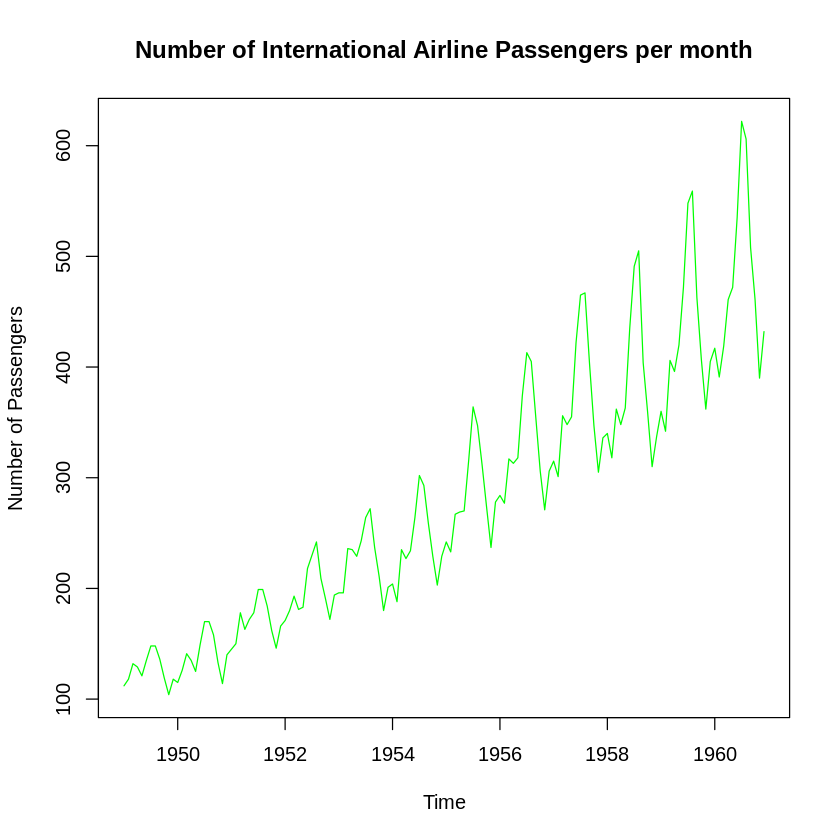

In [ ]:
plot(AirPassengers, col = "green", ylab = "Number of Passengers", main = "Number of International Airline Passengers per month")

##Original Series Autocorrelation, Periodogram and Parzen Window plots

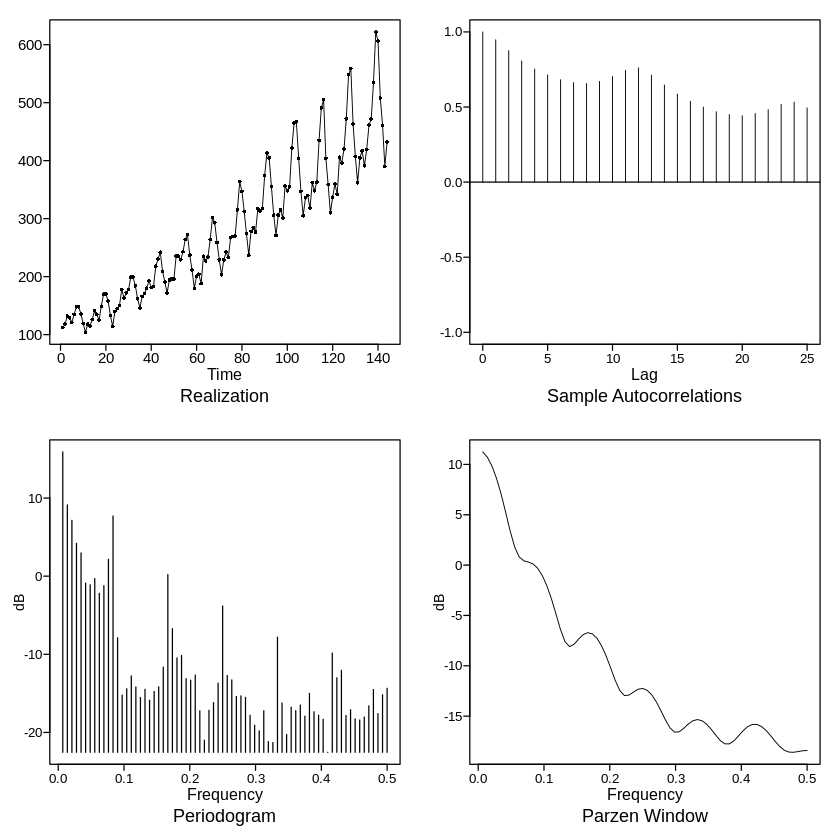

In [ ]:
plot <- plotts.sample.wge(AirPassengers)

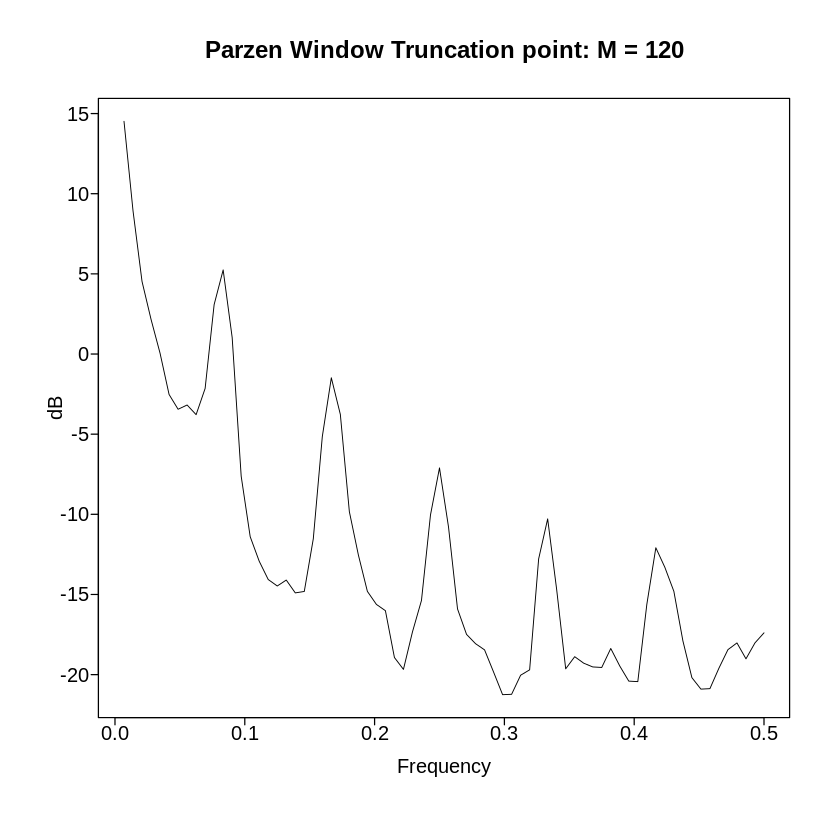

In [ ]:
parz <- parzen.wge(AirPassengers, trunc = 120)

From the Parzen window with truncation point M = 120, we can see a clear peak at approximately f = 0.08. With a frequency of 0.08 cycles per sampling unit we have a period of approximately 12 sampling units. Given that our sampling unit is 1 month we can conclude that our series has a strong cyclical component with a period of 1 year. If we implement a low pass filter reducing the amplitude of frequencies greater than 0.05 we should be able to eliminate the seasonal component of the data. If we implement a high pass filter and reduce the amplitude of frequencies below 0.5 we can retain the seasonal component and eliminate the trend.

##Applying Low Pass Filter

In [ ]:
#Get filtered realizations for different cutoff frequencies (default order = )
lowpass1 <- butterworth.wge(AirPassengers, type = "low", cutoff = 0.05, plot = FALSE, order = 10)
lowpass2 <- butterworth.wge(AirPassengers, type = "low", cutoff = 0.1, plot = FALSE, order = 10)

#Convert realization to time series object
lowpass1_ts <- ts(lowpass1$x.filt, start = c(1949,1), frequency = 12)
lowpass2_ts <- ts(lowpass2$x.filt, start = c(1949,1), frequency = 12)   

###Low Pass Filter with cutoff = 0.1:

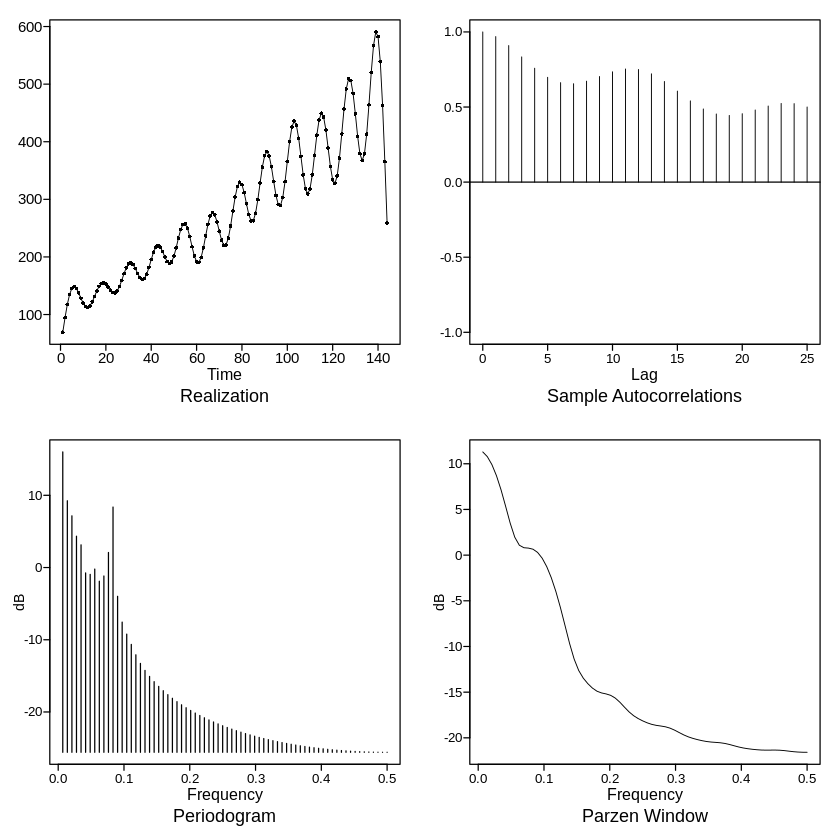

In [ ]:
plot <- plotts.sample.wge(lowpass2_ts)

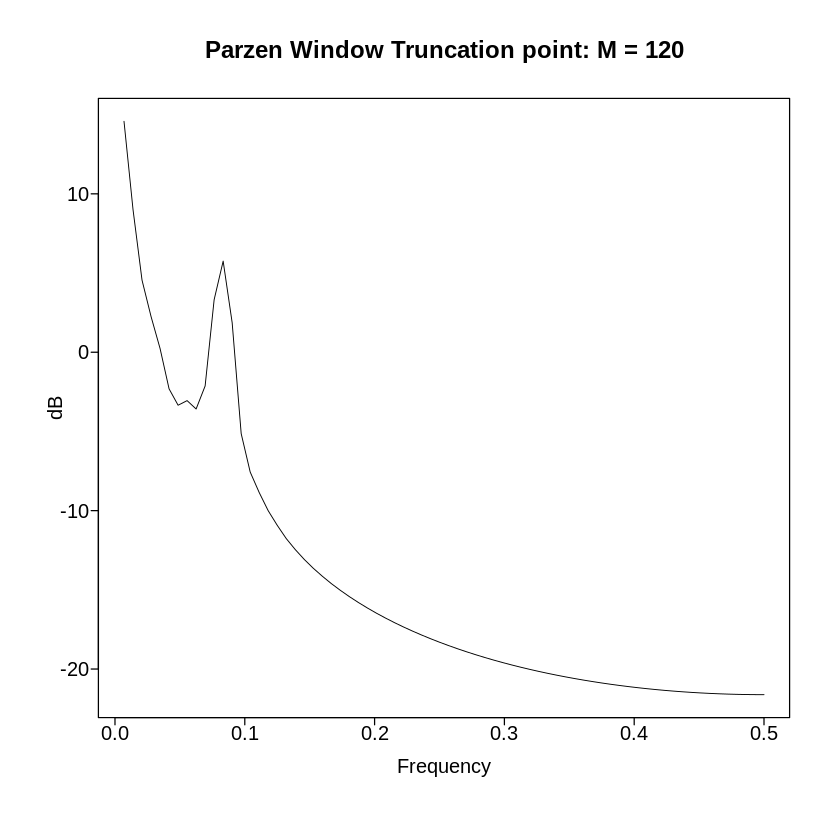

In [ ]:
parz <- parzen.wge(lowpass2_ts, trunc = 120)

We can see from the Parzen Window that after applying the low-pass filter with cutoff = 0.1, the peak at f = 0.08 remains, and there is still a high degree of seasonality.

###Low Pass Filter with cutoff = 0.05:

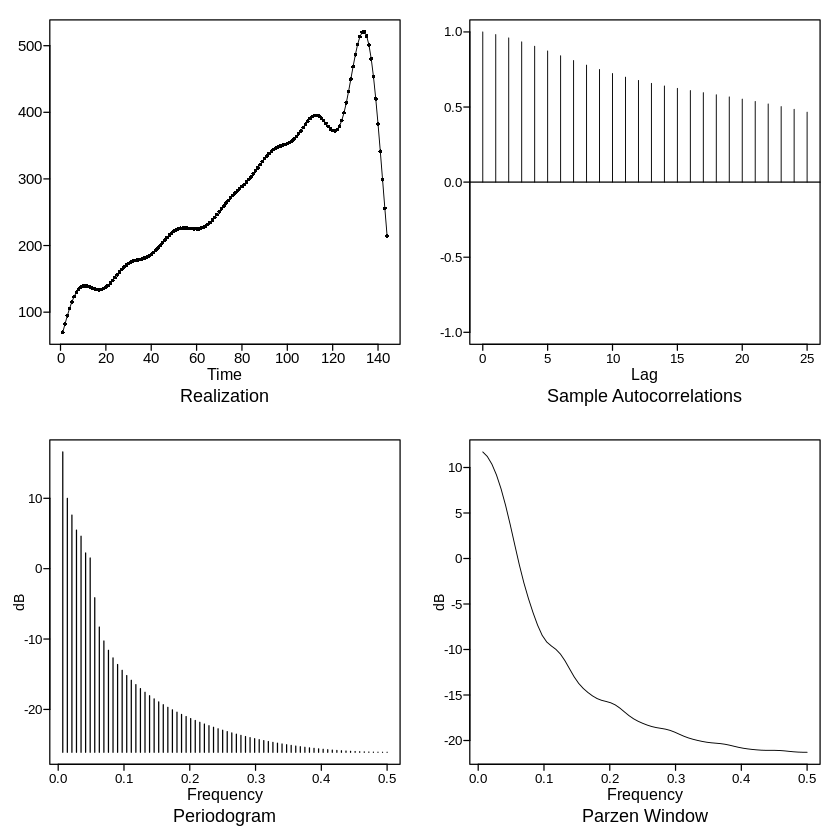

In [ ]:
plot <- plotts.sample.wge(lowpass1_ts)

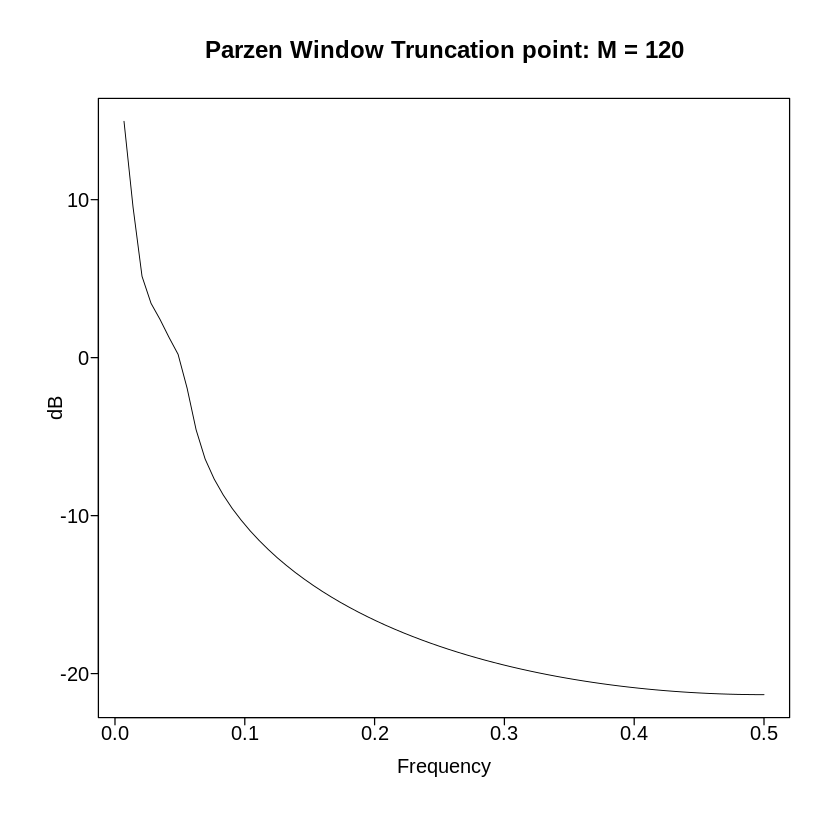

In [ ]:
parz <- parzen.wge(lowpass1_ts, trunc = 120)

We can see from the Parzen Window that after applying the low-pass filter with cutoff = 0.05, the peak at f = 0.08 is gone, and there is no remaining seasonality. We have essentially used the low pass filter to extract the trend component from a seasonal series.

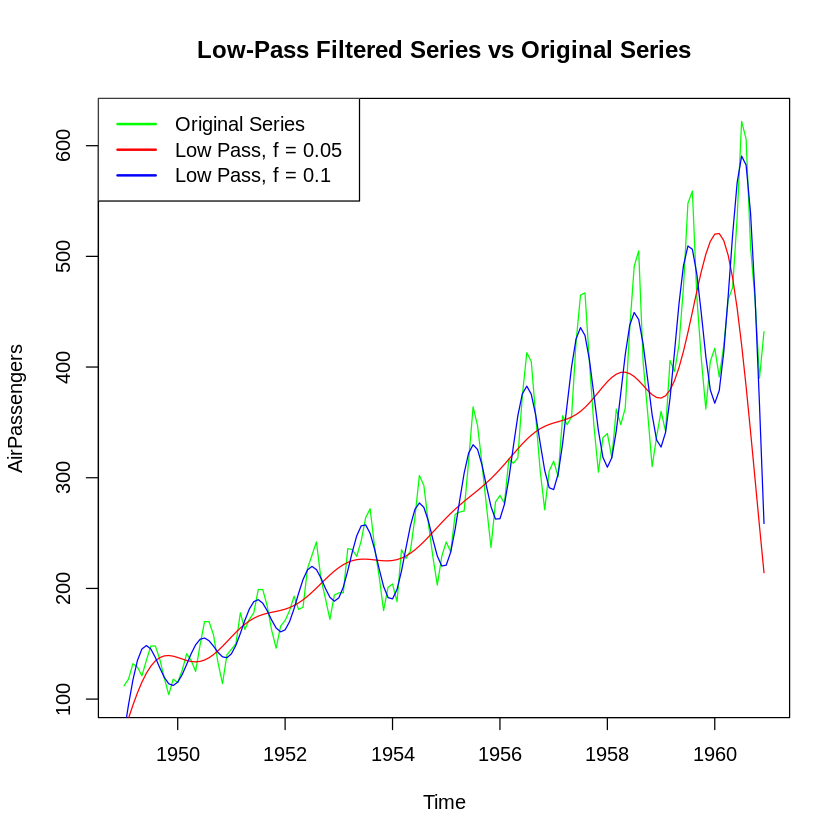

In [ ]:
#Plot filtered realization vs original
plot(AirPassengers, col = "green", main = "Low-Pass Filtered Series vs Original Series")
lines(lowpass1_ts, type = 'l', col = "red")
lines(lowpass2_ts, type = 'l', col = "blue")
legend(x = "topleft",
       legend = c("Original Series", "Low Pass, f = 0.05", "Low Pass, f = 0.1"),
       col = c("green", "red", "blue"),
       lwd = 2,
       lty = c(1, 1, 1))            

In conclusion, by applying a low pass filter and reducing the cutoff below the dominant frequency we can reduce the seasonality of the Airline Passenger data.

##Applying High Pass Filter

In [ ]:
highpass1 <- butterworth.wge(AirPassengers, type = "high", cutoff = 0.05, plot = FALSE)
highpass2 <- butterworth.wge(AirPassengers, type = "high", cutoff = 0.13, plot = FALSE)

highpass1_ts <- ts(highpass1$x.filt, start = c(1949,1), frequency = 12)
highpass2_ts <- ts(highpass2$x.filt, start = c(1949,1), frequency = 12)

###High Pass Filter, with cutoff = 0.05:

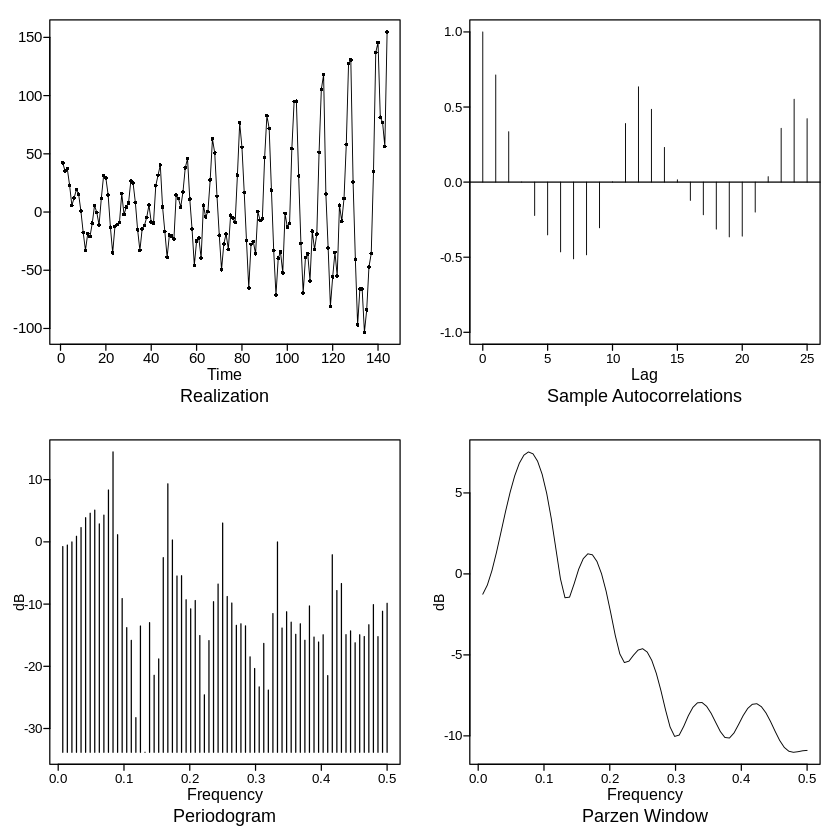

In [ ]:
plot <- plotts.sample.wge(highpass1_ts)

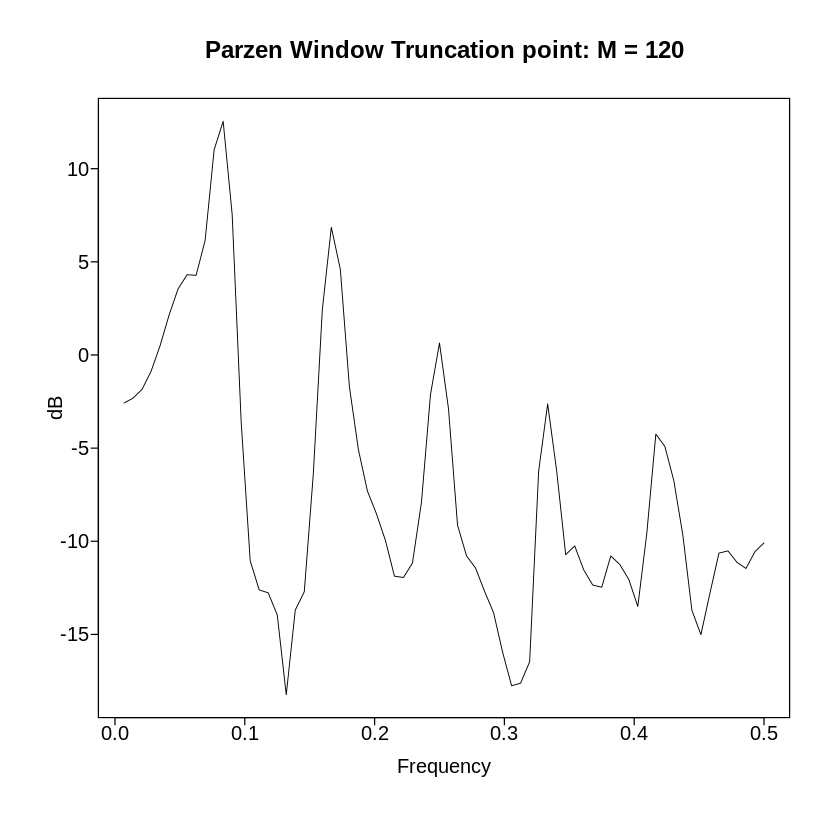

In [ ]:
parz <- parzen.wge(highpass1_ts, trunc = 120)

We can see from the Parzen Window that after applying the high-pass filter with cutoff = 0.05, the peak at f = 0.08 still remains. However, the amplitudes of low frequency oscillations in our data has been greatly reduced, and the trend has basically been eliminated. We have essentially used the high pass filter to extract the seasonal component from a seasonal series.

###High Pass Filter, with cutoff = 0.13:

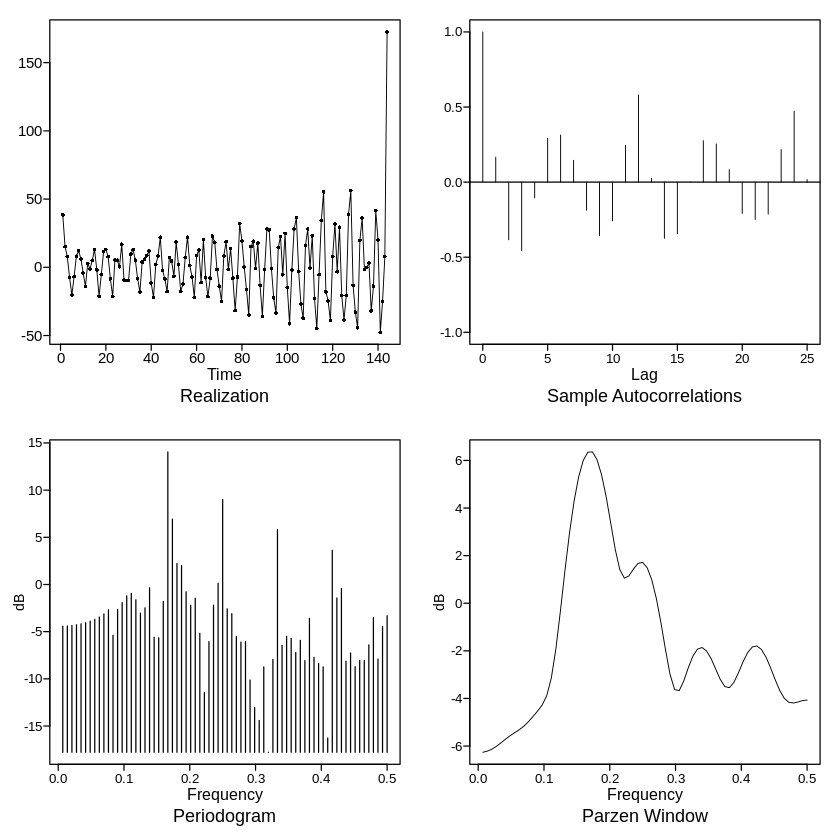

In [ ]:
plot <- plotts.sample.wge(highpass2_ts)

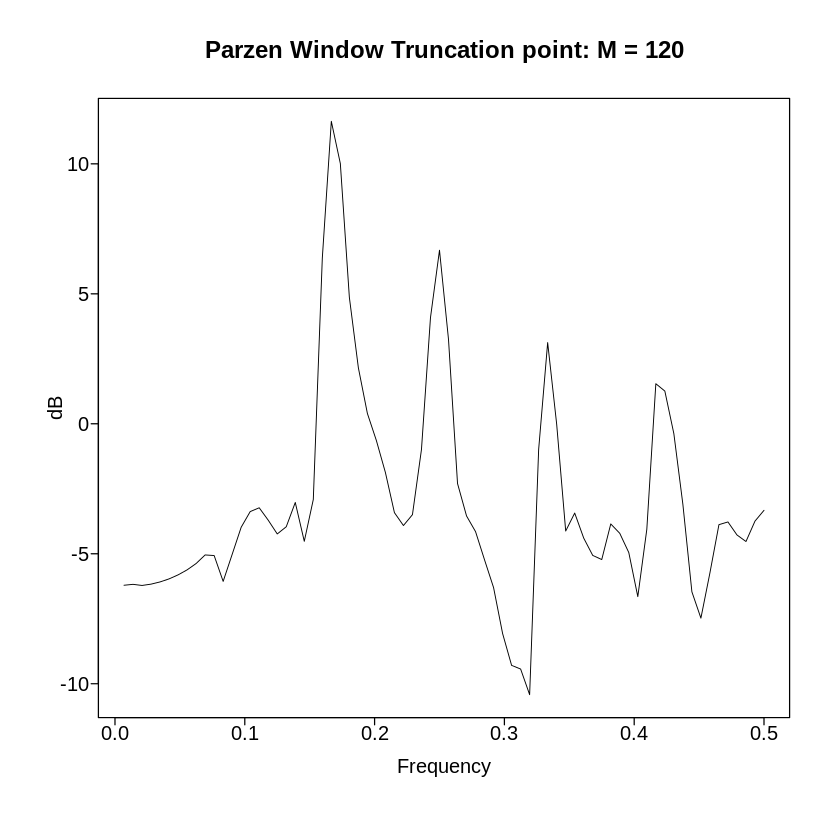

In [ ]:
parz <- parzen.wge(highpass2_ts, trunc = 120)

As we move the cutoff up, the peak at f = 0.08 disappears and we are left with a peak around 0.16. The previously dominant cyclical component which had a 1 year period is no longer evident. Instead we see what appears to be a 6 month cycle.

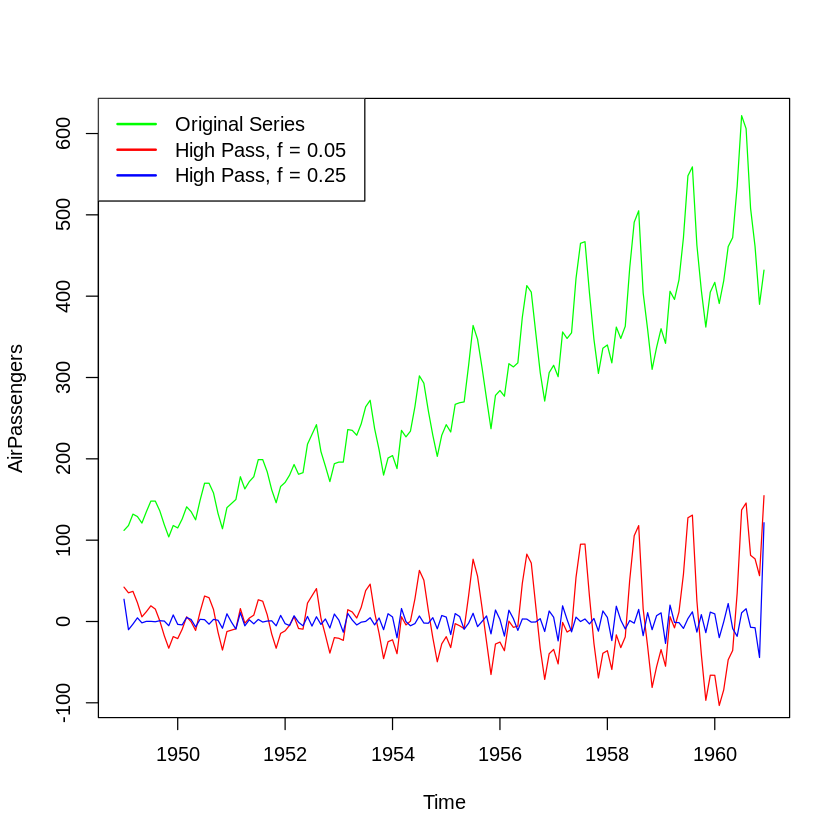

In [ ]:
plot(AirPassengers, col = "green", ylim = c(-90,615))
lines(highpass1_ts, type = 'l', col = "red")
lines(highpass2_ts, type = 'l', col = "blue")
legend(x = "topleft",
       legend = c("Original Series", "High Pass, f = 0.05", "High Pass, f = 0.25"),
       col = c("green", "red", "blue"),
       lwd = 2,
       lty = c(1, 1, 1))  

In conclusion, by applying a high pass filter we can isolate certain cyclical components or remove long term trends.

#Discussion

This series is a great example of how filters can affect the cyclical nature of a series. Due to the seasonal nature of our data, there was a strong cyclical component with a period of 1 year. By applying a low-pass filter to our series and moving the filter cutoff to below f = 0.08 we effectively extracted the trend and removed seasonality. By applying a high-pass filter to our series and moving the cutoff filter below f = 0.08, we effectively extracted the seasonal component and removed the trend.



#References

* Hartman, D. (2016). Filtering of Time Series. Retrieved from https://atmos.washington.edu/~dennis/552_Notes_7.pdf

*   Wayne Woodward (2016). tswge: Applied Time Series Analysis. R package version 1.0.0. https://CRAN.R-project.org/package=tswge

*   Uwe Ligges (2018). tuneR: Analysis of Music and Speech. R package version 1.3.3 https://cran.r-project.org/web/packages/tuneR/index.html

*   Davis, T. (2021). Applied Time Series Analysis: Course Notebook - Student Copy Lesson 3 [ipynb file]. William & Mary, Williamsburg VA. Retrieved from https://colab.research.google.com/drive/1qIdpd_8WFct9zBZ5uwO_Bcg-F3svu0KJ?usp=sharing.tem



